#### Nome: Vinicius Kuwakino, RA: 1977733

# Disciplina: Aprendizagem de Máquina

## Atividade 1: Desenvolvimento de um Classificador Binário por Limiar

##### 1. Calcule as estatísticas descritivas de cada um dos atributos (características) agrupando por espécie;

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline

In [3]:
df = pd.read_csv('iris_2class.csv')
df.groupby('especie').describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),especie
0,7.0,3.2,4.7,1.4,versicolor
1,6.4,3.2,4.5,1.5,versicolor
2,6.9,3.1,4.9,1.5,versicolor
3,5.5,2.3,4.0,1.3,versicolor
4,6.5,2.8,4.6,1.5,versicolor
...,...,...,...,...,...
95,6.7,3.0,5.2,2.3,virginica
96,6.3,2.5,5.0,1.9,virginica
97,6.5,3.0,5.2,2.0,virginica
98,6.2,3.4,5.4,2.3,virginica


- Análise das estatísticas descritivas de cada atributo (característica), agrupando por espécie. Podendo analisar as médias dos comprimentos de pétalas e de sépalas de cada espécie.

##### 2. Faça um histograma para cada atributo. Faça barras separadas para cada espécie de flor.

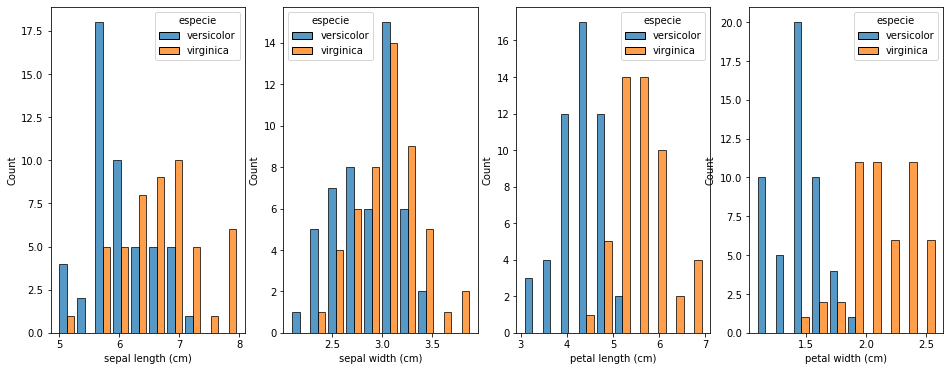

In [3]:
fig, axes = plt.subplots(nrows=1, ncols=4, figsize=(16,6))
sns.histplot(data=df, bins=10, x='sepal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[0])
sns.histplot(data=df, bins=10, x='sepal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[1])
sns.histplot(data=df, bins=10, x='petal length (cm)', hue='especie', multiple='dodge', shrink=0.8, ax=axes[2])
sns.histplot(data=df, bins=10, x='petal width (cm)', hue='especie', multiple='dodge', shrink=0.8,ax=axes[3])
plt.show()

- Analisando os histogramas, podemos observar que há uma melhor separação de cada espécie, nos histogramas de comprimento (petal length) e largura (petal width). Outra observação, é que a espécie "versicolor" possuem comprimentos menores em relação a espécie "virginica", e o mesmo acontece no histograma de largura, onde a espécie "versicolor" são menos largas em relação a espécie "virginica".

##### 3. Com base nos passos 1 e 2, faça scatterplots com os pares de atributos que parecerem ser os mais promissores para classificação das espécies.


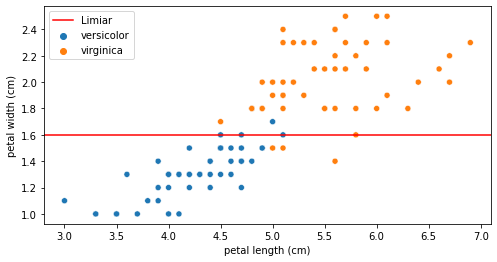

In [77]:
plt.figure(figsize=(8,4))
sns.scatterplot(data=df, x='petal length (cm)', y='petal width (cm)', hue='especie')
plt.axhline(1.6, color='red', label='Limiar')
plt.legend()
plt.show()

- Neste scatterplot, é possível observar que utilizando a característica "largura da pétala", podemos obter uma melhor separação das duas espécies. Mesmo não separando-as perfeitamente, é possível separá-las razoavelmente com o limiar na ``largura=1,60``.

##### 4. A partir das observações que fizer nos passos 1–3, escolha o atributo que achar mais adequado para separar as espécies.

Observando os passos 1, 2 e 3, e o scatterplot do exercício 3, o atributo mais adequado para separar as espécies é a largura da pétada (petal width).

##### 5. Faça uma busca exaustiva procurando maximizar a acurácia no conjunto de teste. Use 80% dos dados para o conjunto de treino e 20% para o conjunto de teste.

In [56]:
def classificador_limiar(limiar, dados, rotulos=('versicolor', 'virginica')):
    resposta = []   
    for idx, dado in dados.iterrows():
        if dado[0] <= limiar:
            resposta.append(rotulos[0])
        else:
            resposta.append(rotulos[1])
    return pd.DataFrame(resposta, columns=['especie'])

def busca_exaustiva_classificador_limiar(n_limiares, atributos, rotulos, alt_min, alt_max):

    limiares = np.linspace(alt_min, alt_max, n_limiares)

    melhor_limiar = limiares[0]
    melhor_acuracia = accuracy_score(rotulos, classificador_limiar(limiares[0], atributos))

    for limiar in limiares:
        predicoes = classificador_limiar(limiar, atributos)
        acuracia = accuracy_score(rotulos, predicoes['especie'])

        if acuracia > melhor_acuracia:
            melhor_acuracia = acuracia
            melhor_limiar = limiar
            
    return melhor_limiar, melhor_acuracia

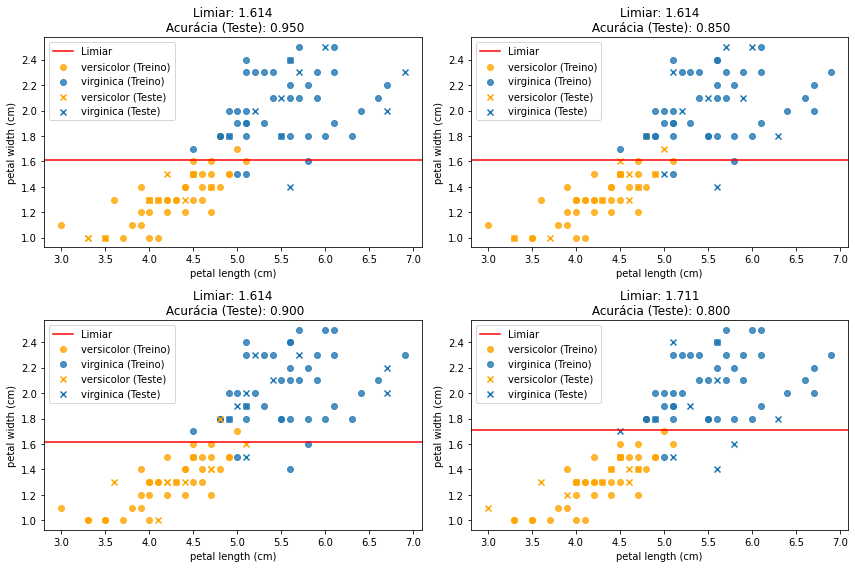

In [80]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
accs = []

for row in range(2):
    for col in range(2):
        x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal width (cm)', 'petal length (cm)']], df['especie'], 
                                                                test_size=0.2, stratify=df['especie'].tolist(),
                                                                shuffle=True)

        axes[row][col].scatter(x = x_treino.loc[y_treino[y_treino=='versicolor'].index].values[:,1], 
                            y = x_treino.loc[y_treino[y_treino=='versicolor'].index].values[:,0],
                                   label='versicolor (Treino)', c='orange', alpha=0.8)

        axes[row][col].scatter(x = x_treino.loc[y_treino[y_treino=='virginica'].index].values[:,1], 
                            y = x_treino.loc[y_treino[y_treino=='virginica'].index].values[:,0],
                                   label='virginica (Treino)', c='#1f77b4', alpha=0.8)

        axes[row][col].scatter(x = x_teste.loc[y_teste[y_teste=='versicolor'].index].values[:,1], 
                            y = x_teste.loc[y_teste[y_teste=='versicolor'].index].values[:,0],
                                   label='versicolor (Teste)', c='orange', marker='x')

        axes[row][col].scatter(x = x_teste.loc[y_teste[y_teste=='virginica'].index].values[:,1], 
                            y = x_teste.loc[y_teste[y_teste=='virginica'].index].values[:,0],
                                   label='virginica (Teste)', c='#1f77b4', marker='x')

        melhor_limiar, melhor_acuracia = busca_exaustiva_classificador_limiar(100, x_treino, y_treino, 1.00, 2.60)
        
        axes[row][col].axhline(melhor_limiar, color='red', label='Limiar')

        axes[row][col].legend()
        axes[row][col].set_xlabel('petal length (cm)')
        axes[row][col].set_ylabel('petal width (cm)')
        
        predicoes = classificador_limiar(melhor_limiar, x_teste)
        acc = accuracy_score(y_teste, predicoes)
        accs.append(acc)
        
        axes[row][col].set_title('Limiar: %.3f\n Acurácia (Teste): %.3f' % (melhor_limiar, acc))

fig.tight_layout()

##### 6. Execute a busca exaustiva implementada no passo 5 com 20 particionamentos diferentes. Reporte a acurácia máxima e mínima obtida. Calcule a acurácia média e o desvio padrão.



Acurácias: 0.850 (min), 1.000 (max), 0.938 +- 0.054 (media+=desvio)


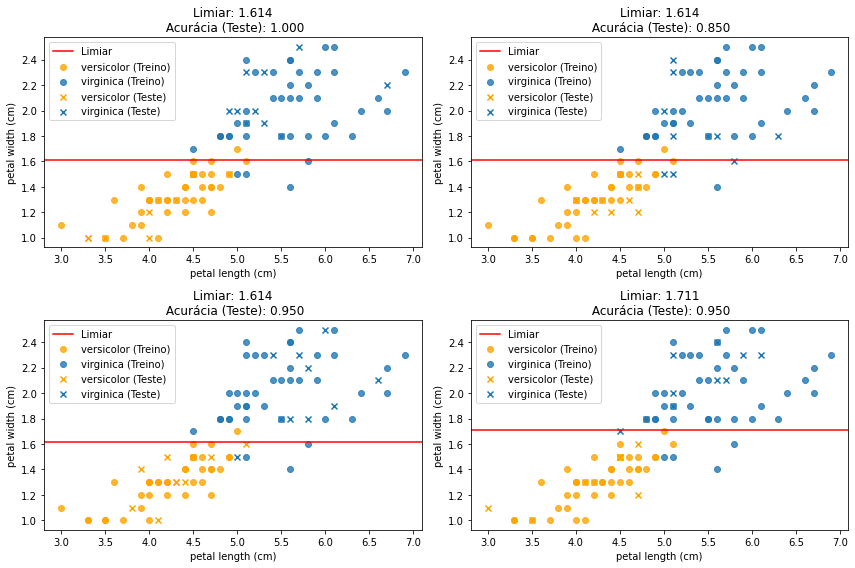

In [75]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
accs = []
rns = [14, 83, 62, 31]

for row in range(2):
    for col in range(2):
        x_treino, x_teste, y_treino, y_teste = train_test_split(df[['petal width (cm)', 'petal length (cm)']], df['especie'], 
                                                                test_size=0.2, stratify=df['especie'].tolist(),
                                                                shuffle=True, random_state=rns[row * 2 + col])

        axes[row][col].scatter(x = x_treino.loc[y_treino[y_treino=='versicolor'].index].values[:,1], 
                            y = x_treino.loc[y_treino[y_treino=='versicolor'].index].values[:,0],
                                   label='versicolor (Treino)', c='orange', alpha=0.8)

        axes[row][col].scatter(x = x_treino.loc[y_treino[y_treino=='virginica'].index].values[:,1], 
                            y = x_treino.loc[y_treino[y_treino=='virginica'].index].values[:,0],
                                   label='virginica (Treino)', c='#1f77b4', alpha=0.8)

        axes[row][col].scatter(x = x_teste.loc[y_teste[y_teste=='versicolor'].index].values[:,1], 
                            y = x_teste.loc[y_teste[y_teste=='versicolor'].index].values[:,0],
                                   label='versicolor (Teste)', c='orange', marker='x')

        axes[row][col].scatter(x = x_teste.loc[y_teste[y_teste=='virginica'].index].values[:,1], 
                            y = x_teste.loc[y_teste[y_teste=='virginica'].index].values[:,0],
                                   label='virginica (Teste)', c='#1f77b4', marker='x')

        melhor_limiar, melhor_acuracia = busca_exaustiva_classificador_limiar(100, x_treino, y_treino, 1.00, 2.60)
        
        axes[row][col].axhline(melhor_limiar, color='red', label='Limiar')

        axes[row][col].legend()
        axes[row][col].set_xlabel('petal length (cm)')
        axes[row][col].set_ylabel('petal width (cm)')
        
        predicoes = classificador_limiar(melhor_limiar, x_teste)
        acc = accuracy_score(y_teste, predicoes)
        accs.append(acc)
        
        axes[row][col].set_title('Limiar: %.3f\n Acurácia (Teste): %.3f' % (melhor_limiar, acc))

fig.tight_layout()

print("Acurácias: %.3f (min), %.3f (max), %.3f +- %.3f (media+=desvio)" % (min(accs), max(accs), np.mean(accs), np.std(accs)))